In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/mlp/dissertation')
!ls

Mounted at /content/drive
code_1.ipynb		  eq_Europe_exUK.csv	       Equity_risk2.csv
data1.csv		  eq_Global_Emerging_Mkts.csv  Equity_risk3.csv
eq_Africa_with_other.csv  eq_India.csv		       Equity_risk.csv
eq_Asia_exJapan.csv	  eq_Japan.csv		       eq_UK.csv
eq_China.csv		  eq_North_America.csv	       ESG_rating.csv


In [2]:
!pip install IPython==7.31 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 792 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.7 MB/s 
  Attempting uninstall: IPython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 7.31.0 which is incompatible.


In [5]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Multiple Regression Analysis

 ## Data collection

In [9]:
d = pd.read_csv("./data1.csv") #read data for different environmental variables
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             9876 non-null   int64  
 1   date               9876 non-null   int64  
 2   company            9876 non-null   object 
 3   peer_group_root    9876 non-null   object 
 4   type_template      9876 non-null   object 
 5   type_listing       9876 non-null   object 
 6   region             9876 non-null   object 
 7   country            9876 non-null   object 
 8   isin               9876 non-null   object 
 9   total_esg_score    9876 non-null   float64
 10  governance_score   9876 non-null   float64
 11  social_score       9876 non-null   float64
 12  environment_score  9876 non-null   float64
 13  e_1_1              9876 non-null   float64
 14  e_1_2              9876 non-null   float64
 15  e_1_3              9876 non-null   object 
 16  e_1_4              9876 

In [10]:
d=d.replace(".",np.NAN) #replace .with NAN

In [15]:
d.head()  # find the variables with missing values
d.isnull().sum() 



number                0
date                  0
company               0
peer_group_root       0
type_template         0
                   ... 
e_3_1_13           9103
e_3_1_14           9103
e_3_1_15           8269
e_3_1_16           9771
e_3_1_17           9642
Length: 70, dtype: int64

Here, I choose those variabls that the numpy values is less than 50%

In [16]:
number_name=[]
for i in range(len(d.columns)):
  if d[d.columns[i]].isnull().sum()/9876<0.5:   # A column of null values needs to be less than 50%
    number_name.append(d.columns[i])
d_1=d[number_name]
d_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             9876 non-null   int64  
 1   date               9876 non-null   int64  
 2   company            9876 non-null   object 
 3   peer_group_root    9876 non-null   object 
 4   type_template      9876 non-null   object 
 5   type_listing       9876 non-null   object 
 6   region             9876 non-null   object 
 7   country            9876 non-null   object 
 8   isin               9876 non-null   object 
 9   total_esg_score    9876 non-null   float64
 10  governance_score   9876 non-null   float64
 11  social_score       9876 non-null   float64
 12  environment_score  9876 non-null   float64
 13  e_1_1              9876 non-null   float64
 14  e_1_2              9876 non-null   float64
 15  e_1_3              5494 non-null   object 
 16  e_1_4              5492 

We need to transfer variables with objective format into numeric format.

In [17]:
num_name=['e_1_3', 'e_1_4', 'e_1_6', 'e_1_8', 'e_1_9', 'e_1_10','e_1_11']
for i in num_name:
  d_1[i]=pd.to_numeric(d_1[i])
d_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             9876 non-null   int64  
 1   date               9876 non-null   int64  
 2   company            9876 non-null   object 
 3   peer_group_root    9876 non-null   object 
 4   type_template      9876 non-null   object 
 5   type_listing       9876 non-null   object 
 6   region             9876 non-null   object 
 7   country            9876 non-null   object 
 8   isin               9876 non-null   object 
 9   total_esg_score    9876 non-null   float64
 10  governance_score   9876 non-null   float64
 11  social_score       9876 non-null   float64
 12  environment_score  9876 non-null   float64
 13  e_1_1              9876 non-null   float64
 14  e_1_2              9876 non-null   float64
 15  e_1_3              5494 non-null   float64
 16  e_1_4              5492 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


View all department types

In [18]:
d_1['peer_group_root'].unique()

array(['Insurance', 'Software & Services', 'Banks',
       'Construction & Engineering', 'Commercial Services', 'Media',
       'Real Estate', 'Energy Services', 'Food Retailers',
       'Transportation', 'Consumer Services', 'Retailing', 'Utilities',
       'Telecommunication Services', 'Refiners & Pipelines', 'Chemicals',
       'Machinery', 'Diversified Metals', 'Pharmaceuticals',
       'Oil & Gas Producers', 'Household Products', 'Aerospace & Defense',
       'Diversified Financials', 'Traders & Distributors',
       'Construction Materials', 'Auto Components', 'Homebuilders',
       'Textiles & Apparel', 'Food Products', 'Healthcare',
       'Technology Hardware', 'Industrial Conglomerates',
       'Electrical Equipment', 'Containers & Packaging',
       'Precious Metals', 'Building Products', 'Paper & Forestry',
       'Transportation Infrastructure', 'Consumer Durables',
       'Automobiles', 'Steel', 'Semiconductors'], dtype=object)

In [19]:
replacement_mapping_dict={"Type_A":"A",  # Replace some wrong values
            "Type_B":"B"}
d_1['type_template']=d_1['type_template'].replace(replacement_mapping_dict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
d_1.describe()

,number,date,total_esg_score,governance_score,social_score,environment_score,e_1_1,e_1_2,e_1_3,e_1_4,...,e_1_6,e_1_8,e_1_9,e_1_10,e_1_11,e_1_12,e_1_7_0,e_2_1,e_2_2,e_3_2
count,9876.000000,9.876000e+03,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000,5494.000000,5492.000000,...,5494.000000,5487.000000,5494.000000,5494.000000,5494.000000,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000
mean,4938.500000,2.018311e+07,61.472899,63.343604,61.682936,60.642682,0.716715,1.292292,0.464016,0.791832,...,0.450183,0.191160,0.346826,0.377290,0.272488,5.906915,1.017750,0.957204,2.364835,3.397843
std,2851.099963,6.734794e+03,10.010274,10.516822,11.043450,14.422328,0.645584,1.013618,0.589727,0.463558,...,0.278072,0.210454,0.502112,0.325277,0.273595,2.163486,0.804793,1.170028,1.081679,1.631774
min,1.000000,2.017091e+07,26.080000,12.000000,30.950000,26.070000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.872000,0.000000,0.000000,1.000000,0.900000
25%,2469.750000,2.018030e+07,53.135000,56.030000,54.170000,48.780000,0.300000,0.600000,0.000000,0.500000,...,0.284800,0.000000,0.000000,0.116000,0.100000,3.500000,0.500000,0.000000,1.000000,2.000000
50%,4938.500000,2.018100e+07,61.580000,63.790000,61.340000,60.450000,0.562500,1.000000,0.283300,0.600000,...,0.500000,0.125000,0.177300,0.300000,0.156700,5.000000,0.800000,0.634600,2.500000,3.000000
75%,7407.250000,2.019040e+07,69.410000,70.350000,69.040000,72.080000,0.817500,1.800000,0.744200,1.057700,...,0.570000,0.297500,0.500000,0.500000,0.500000,7.245250,1.300000,1.200000,3.000000,4.950000
max,9876.000000,2.019090e+07,87.470000,96.400000,92.830000,95.290000,5.000000,7.000000,2.634100,2.347800,...,1.189200,1.000000,3.730000,2.490000,1.538500,12.000000,5.000000,7.000000,5.000000,7.010000


Select all the environmental variables to check the correlation coefficient

In [21]:
e_fea = ['e_1_1',
       'e_1_2', 'e_1_3', 'e_1_4', 'e_1_5', 'e_1_6', 'e_1_8', 'e_1_9', 'e_1_10',
       'e_1_11', 'e_1_12', 'e_1_7_0', 'e_2_1', 'e_2_2', 'e_3_2']

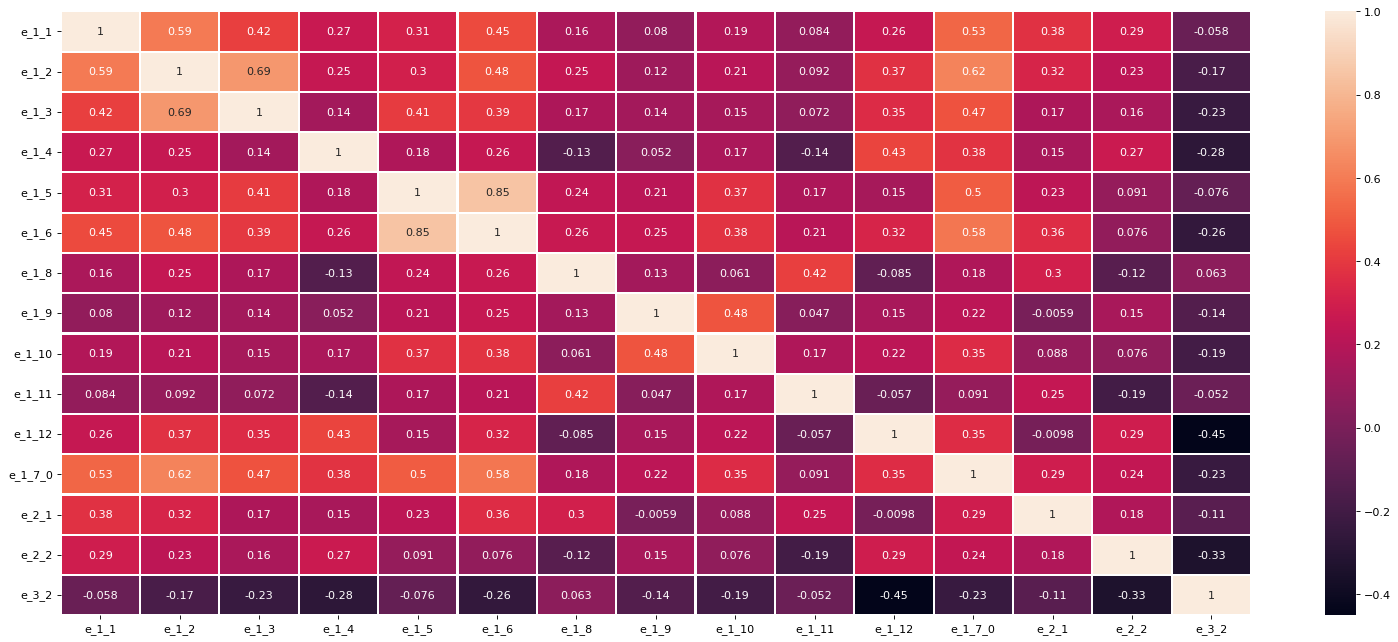

In [22]:
plt.figure(figsize=(24,10))
d_1_corr = d_1[e_fea]
corr = d_1_corr.corr()
sns.heatmap(corr,annot = True,linewidths = 1)
plt.show()

In [23]:
# drop any features that are correlated above a 0.7 theshold.
!pip install feature_engine
from feature_engine.selection import DropCorrelatedFeatures



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.4 MB/s 


In [24]:
fs = DropCorrelatedFeatures(variables=None,method='pearson',threshold=0.7)
X_fs = fs.fit_transform(d_1_corr)
# Correlated Feature Groups
display(fs.correlated_feature_sets_)
# Dropped
list(np.setdiff1d(list(d_1_corr.columns), list(X_fs.columns)))


[{'e_1_5', 'e_1_6'}]

['e_1_6']

## calculate average environment score for sector comparation

In [25]:
d_1.groupby('peer_group_root')['environment_score'].mean().sort_values(ascending=False)

peer_group_root
Paper & Forestry                 82.570800
Electrical Equipment             78.569706
Homebuilders                     76.058190
Auto Components                  74.757959
Telecommunication Services       72.782395
Household Products               71.516267
Containers & Packaging           70.522414
Energy Services                  69.566684
Aerospace & Defense              68.392154
Semiconductors                   67.398000
Food Products                    66.389892
Steel                            66.097097
Traders & Distributors           65.733511
Food Retailers                   65.044000
Real Estate                      64.387969
Utilities                        64.360191
Media                            64.221614
Commercial Services              63.408747
Precious Metals                  62.863376
Pharmaceuticals                  62.625889
Construction Materials           62.270847
Healthcare                       62.213889
Machinery                        61.85

replace all the 42 sectors into just 11 sectors according to S&P sectors

In [26]:
d_2=d_1.copy()
d_2['peer_group_root'].unique()

array(['Insurance', 'Software & Services', 'Banks',
       'Construction & Engineering', 'Commercial Services', 'Media',
       'Real Estate', 'Energy Services', 'Food Retailers',
       'Transportation', 'Consumer Services', 'Retailing', 'Utilities',
       'Telecommunication Services', 'Refiners & Pipelines', 'Chemicals',
       'Machinery', 'Diversified Metals', 'Pharmaceuticals',
       'Oil & Gas Producers', 'Household Products', 'Aerospace & Defense',
       'Diversified Financials', 'Traders & Distributors',
       'Construction Materials', 'Auto Components', 'Homebuilders',
       'Textiles & Apparel', 'Food Products', 'Healthcare',
       'Technology Hardware', 'Industrial Conglomerates',
       'Electrical Equipment', 'Containers & Packaging',
       'Precious Metals', 'Building Products', 'Paper & Forestry',
       'Transportation Infrastructure', 'Consumer Durables',
       'Automobiles', 'Steel', 'Semiconductors'], dtype=object)

In [27]:
replacement_sector={'Software & Services':'Techonology','Electrical Equipment':'Techonology','Technology Hardware':'Techonology','Semiconductors':'Techonology',
          'Pharmaceuticals':'Healthcare',
          'Insurance':'Financials','Banks':'Financials','Diversified Financials':'Financials',
          'Household Products':'Consumer Discreditionary','Consumer Durables':'Consumer Discreditionary', 
          'Textiles & Apparel':'Consumer Discreditionary','Retailing':'Consumer Discreditionary','Auto Components':'Consumer Discreditionary',
          'Media':'Communication Services','Telecommunication Services':'Communication Services','Commercial Services':'Industrials',
          'Food Retailers':'Consumer Staples','Food Products':'Consumer Staples','Construction & Engineering':'Industrials',
          'Traders & Distributors':'Industrials','Transportation':'Industrials','Machinery':'Industrials','Aerospace & Defense':'Industrials',
          'Homebuilders':'Industrials','Industrial Conglomerates':'Industrials','Containers & Packaging':'Industrials','Building Products':'Industrials',
          'Transportation Infrastructure':'Industrials','Automobiles':'Industrials','Steel':'Industrials','Consumer Services':'Industrials',
          'Energy Services':'Energy','Refiners & Pipelines':'Energy','Oil & Gas Producers':'Energy',
          'Chemicals':'Materials','Diversified Metals':'Materials','Construction Materials':'Materials','Precious Metals':'Materials','Paper & Forestry':'Materials'}


In [28]:
for i,j in replacement_sector.items():  # check the infromation after replacement
  d_2=d_2.replace(i,j)
d_2['peer_group_root'].unique()
d_2.describe()

,number,date,total_esg_score,governance_score,social_score,environment_score,e_1_1,e_1_2,e_1_3,e_1_4,...,e_1_6,e_1_8,e_1_9,e_1_10,e_1_11,e_1_12,e_1_7_0,e_2_1,e_2_2,e_3_2
count,9876.000000,9.876000e+03,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000,5494.000000,5492.000000,...,5494.000000,5487.000000,5494.000000,5494.000000,5494.000000,9876.000000,9876.000000,9876.000000,9876.000000,9876.000000
mean,4938.500000,2.018311e+07,61.472899,63.343604,61.682936,60.642682,0.716715,1.292292,0.464016,0.791832,...,0.450183,0.191160,0.346826,0.377290,0.272488,5.906915,1.017750,0.957204,2.364835,3.397843
std,2851.099963,6.734794e+03,10.010274,10.516822,11.043450,14.422328,0.645584,1.013618,0.589727,0.463558,...,0.278072,0.210454,0.502112,0.325277,0.273595,2.163486,0.804793,1.170028,1.081679,1.631774
min,1.000000,2.017091e+07,26.080000,12.000000,30.950000,26.070000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.872000,0.000000,0.000000,1.000000,0.900000
25%,2469.750000,2.018030e+07,53.135000,56.030000,54.170000,48.780000,0.300000,0.600000,0.000000,0.500000,...,0.284800,0.000000,0.000000,0.116000,0.100000,3.500000,0.500000,0.000000,1.000000,2.000000
50%,4938.500000,2.018100e+07,61.580000,63.790000,61.340000,60.450000,0.562500,1.000000,0.283300,0.600000,...,0.500000,0.125000,0.177300,0.300000,0.156700,5.000000,0.800000,0.634600,2.500000,3.000000
75%,7407.250000,2.019040e+07,69.410000,70.350000,69.040000,72.080000,0.817500,1.800000,0.744200,1.057700,...,0.570000,0.297500,0.500000,0.500000,0.500000,7.245250,1.300000,1.200000,3.000000,4.950000
max,9876.000000,2.019090e+07,87.470000,96.400000,92.830000,95.290000,5.000000,7.000000,2.634100,2.347800,...,1.189200,1.000000,3.730000,2.490000,1.538500,12.000000,5.000000,7.000000,5.000000,7.010000


Calculate the environment mean score

In [29]:
d_2.groupby('peer_group_root')['environment_score'].mean().sort_values(ascending=False)

peer_group_root
Communication Services      66.678058
Consumer Staples            66.050020
Real Estate                 64.387969
Utilities                   64.360191
Energy                      63.465340
Healthcare                  62.476448
Materials                   61.830328
Industrials                 61.174729
Consumer Discreditionary    58.527845
Financials                  56.905947
Techonology                 54.284547
Name: environment_score, dtype: float64

Calculate the total ESG score mean score

In [30]:
d_2.groupby('peer_group_root')['total_esg_score'].mean().sort_values(ascending=False)


peer_group_root
Utilities                   68.102787
Energy                      67.431073
Materials                   66.045365
Communication Services      63.370653
Consumer Staples            63.073293
Real Estate                 61.989185
Industrials                 61.589246
Consumer Discreditionary    60.782713
Financials                  60.161009
Healthcare                  57.066700
Techonology                 53.315931
Name: total_esg_score, dtype: float64

## comparing the data of different departments of OBMG fund




In [31]:
df = pd.read_csv("./ESG_rating.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Security Description  345 non-null    object
 1   ISIN                  336 non-null    object
 2   CUSIP                 345 non-null    object
 3   Market Value %        345 non-null    object
 4   GICS Sector           331 non-null    object
 5   Country Name          343 non-null    object
 6   MSCI ESG Rating       278 non-null    object
dtypes: object(7)
memory usage: 19.0+ KB


cancel all of the numpy rows

In [34]:
df_1=df.dropna(axis=0,how='any')
df_1

,Security Description,ISIN,CUSIP,Market Value %,GICS Sector,Country Name,MSCI ESG Rating
0,3I GROUP PLC,GB00B1YW4409,SB1YW4404,0.2%,Financials,United Kingdom,AA
2,888 HOLDINGS PLC,GI000A0F6407,SB0L4LM97,0.0%,Consumer Discretionary,United Kingdom,AA
3,A G BARR PLC,GB00B6XZKY75,SB6XZKY74,0.0%,Consumer Staples,United Kingdom,A
4,ABRDN PLC,GB00BF8Q6K64,SBF8Q6K67,0.1%,Financials,United Kingdom,AAA
5,ADMIRAL GROUP PLC,GB00B02J6398,SB02J6397,0.0%,Financials,United Kingdom,A
...,...,...,...,...,...,...,...
340,WOOD GROUP (JOHN) PLC,GB00B5N0P849,SB5N0P840,0.0%,Energy,United Kingdom,AA
341,WORKSPACE GROUP REIT PLC,GB00B67G5X01,SB67G5X01,0.0%,Real Estate,United Kingdom,AA
342,WPP PLC,JE00B8KF9B49,SB8KF9B49,0.1%,Communication Services,United Kingdom,AA
343,XPS PENSIONS GROUP PLC,GB00BDDN1T20,SBDDN1T22,0.0%,Financials,United Kingdom,A


OBMG fund uses ESG ratings developed
by MSCI to assess company’s management of financially relevant ESG risks and opportunities between
different sectors. Their ESG ratings range from
leader (AAA, AA), average (A, BBB, BB) to laggard (B, CCC) can be calculated as follows:

In [35]:
ESG_count=df_1.groupby(['GICS Sector','MSCI ESG Rating'])['MSCI ESG Rating'].count()
ESG_count

GICS Sector             MSCI ESG Rating
Communication Services  A                   4
                        AA                  8
                        AAA                 1
Consumer Discretionary  A                  10
                        AA                 24
                        AAA                 6
                        BB                  2
                        BBB                 5
Consumer Staples        A                   5
                        AA                  9
                        AAA                 3
                        BBB                 1
Energy                  A                   3
                        AA                  4
Financials              A                   8
                        AA                 16
                        AAA                 8
                        BB                  5
                        BBB                 9
Health Care             AA                  6
                        AAA             

In [36]:
sector=[]
ESG_rating=[]
ESG_num=[]
for i in range(len(ESG_count.index)):
  sector.append(ESG_count.index[i][0])
  ESG_rating.append(ESG_count.index[i][1])
  ESG_num.append(ESG_count[i])


Calculate the AAA percentage and BBB percentage of different sectors

In [37]:
ESG_data=pd.DataFrame({'sector':sector,'ESG_rating':ESG_rating,'ESG_count':ESG_num})
ESG_=ESG_data.pivot_table(index='sector',columns='ESG_rating',values='ESG_count')
ESG_=pd.DataFrame(ESG_)
ESG_['count']=ESG_.sum(axis=1)
ESG_AAA_per=ESG_['AAA']/ESG_['count']
ESG_BBB_per=ESG_['BBB']/ESG_['count']
ESG_AAA_per

sector
Communication Services    0.076923
Consumer Discretionary    0.127660
Consumer Staples          0.166667
Energy                         NaN
Financials                0.173913
Health Care               0.090909
Industrials               0.223881
Information Technology    0.058824
Materials                 0.266667
Real Estate               0.148148
Utilities                 0.222222
dtype: float64

In [38]:
ESG_BBB_per

sector
Communication Services         NaN
Consumer Discretionary    0.106383
Consumer Staples          0.055556
Energy                         NaN
Financials                0.195652
Health Care               0.363636
Industrials               0.074627
Information Technology    0.176471
Materials                 0.066667
Real Estate               0.074074
Utilities                 0.111111
dtype: float64

Counting ESG at different levels in different sectors

In [39]:
ESG_data

,sector,ESG_rating,ESG_count
0,Communication Services,A,4
1,Communication Services,AA,8
2,Communication Services,AAA,1
3,Consumer Discretionary,A,10
4,Consumer Discretionary,AA,24
5,Consumer Discretionary,AAA,6
6,Consumer Discretionary,BB,2
7,Consumer Discretionary,BBB,5
8,Consumer Staples,A,5
9,Consumer Staples,AA,9


In [40]:
ESG_

ESG_rating,A,AA,AAA,B,BB,BBB,count
sector,,,,,,,
Communication Services,4.0,8.0,1.0,NaN,NaN,NaN,13.0
Consumer Discretionary,10.0,24.0,6.0,NaN,2.0,5.0,47.0
Consumer Staples,5.0,9.0,3.0,NaN,NaN,1.0,18.0
Energy,3.0,4.0,NaN,NaN,NaN,NaN,7.0
Financials,8.0,16.0,8.0,NaN,5.0,9.0,46.0
Health Care,NaN,6.0,1.0,NaN,NaN,4.0,11.0
Industrials,14.0,31.0,15.0,1.0,1.0,5.0,67.0
Information Technology,7.0,6.0,1.0,NaN,NaN,3.0,17.0
Materials,5.0,5.0,4.0,NaN,NaN,1.0,15.0


Draw a distribution map of ESG at different levels in different departments

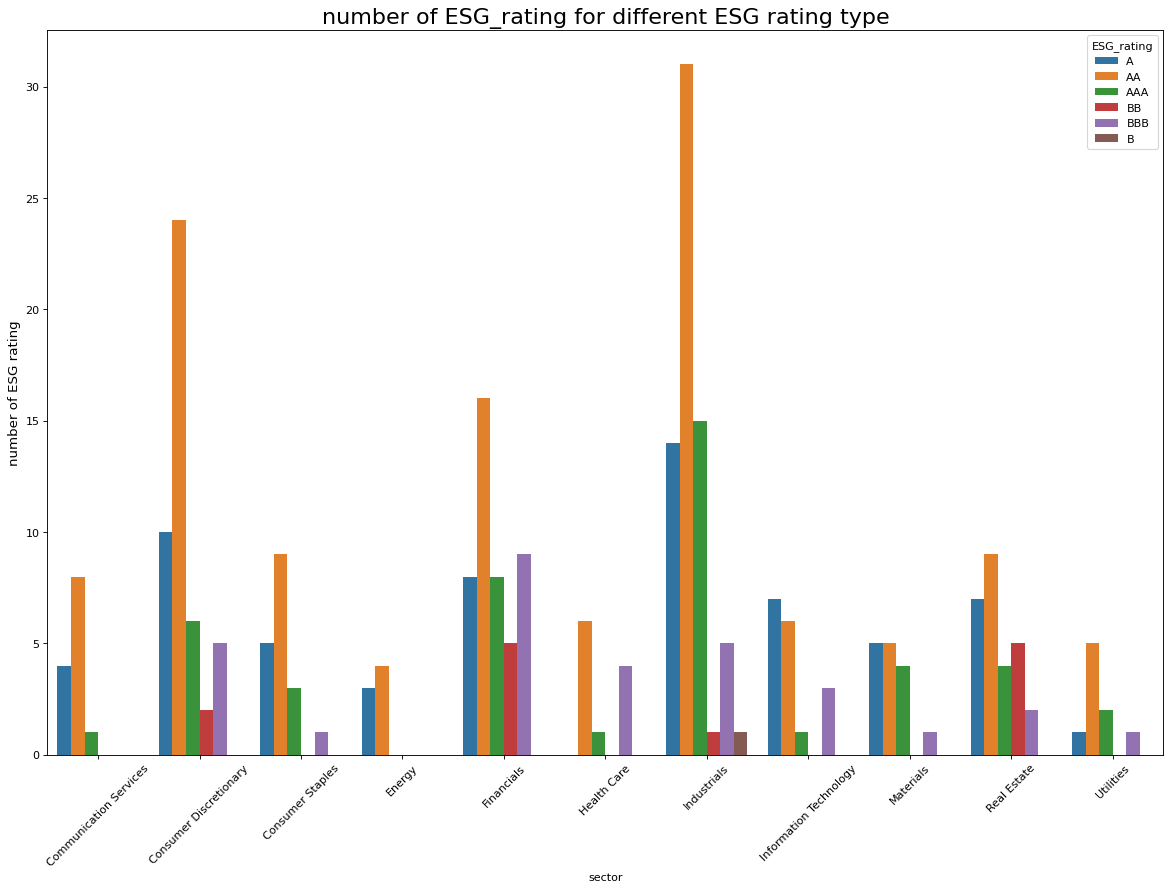

In [41]:
plt.figure(figsize = (18,12))
plt.title("number of ESG_rating for different ESG rating type", fontsize = 20)
sns.barplot(data = ESG_data, x = "sector", y = "ESG_count", hue = "ESG_rating")
plt.ylabel("number of ESG rating", fontsize = 12)
plt.xticks(rotation=45)
plt.show()


In [42]:
d_3=d_2.dropna(axis=0,how='any') # cancel the rows with missing values
d_3

,number,date,company,peer_group_root,type_template,type_listing,region,country,isin,total_esg_score,...,e_1_6,e_1_8,e_1_9,e_1_10,e_1_11,e_1_12,e_1_7_0,e_2_1,e_2_2,e_3_2
0,1,20190902,Zurich Finance (UK) Plc,Financials,A,Private,Europe,United Kingdom,SUSTE13EEC7B,83.65,...,0.5,0.125,0.5,0.375,0.5,3.5,0.50,0.6,1.0,4.95
24,25,20180703,Yorkshire Building Society,Financials,A,Private,Europe,United Kingdom,XS1203856072,51.17,...,0.5,0.100,0.0,0.200,0.5,3.5,0.20,0.0,1.0,5.00
25,26,20180801,Yorkshire Building Society,Financials,A,Private,Europe,United Kingdom,XS1203856072,51.17,...,0.5,0.100,0.0,0.200,0.5,3.5,0.20,0.0,1.0,5.00
26,27,20190204,Yorkshire Building Society,Financials,A,Private,Europe,United Kingdom,XS1203856072,51.17,...,0.5,0.125,0.0,0.250,0.5,3.5,0.25,0.0,1.0,5.02
27,28,20171002,Yorkshire Building Society,Financials,A,Private,Europe,United Kingdom,XS1046237431,51.45,...,0.0,0.125,0.1,0.100,0.5,3.5,0.25,0.6,1.0,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,9872,20180109,3i Group plc,Financials,A,Public,Europe,United Kingdom,GB00B1YW4409,70.74,...,0.5,0.000,0.5,0.000,0.1,3.5,0.50,0.8,1.0,5.00
9872,9873,20171206,3i Group plc,Financials,A,Public,Europe,United Kingdom,GB00B1YW4409,70.74,...,0.5,0.000,0.5,0.000,0.1,3.5,0.50,0.8,1.0,5.00
9873,9874,20171101,3i Group plc,Financials,A,Public,Europe,United Kingdom,GB00B1YW4409,70.74,...,0.5,0.000,0.5,0.000,0.1,3.5,0.50,0.8,1.0,5.00
9874,9875,20171002,3i Group plc,Financials,A,Public,Europe,United Kingdom,GB00B1YW4409,70.74,...,0.5,0.000,0.5,0.000,0.1,3.5,0.50,0.8,1.0,5.00


The skewness of different environment variables

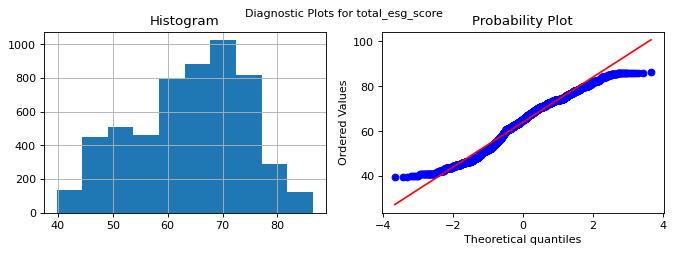

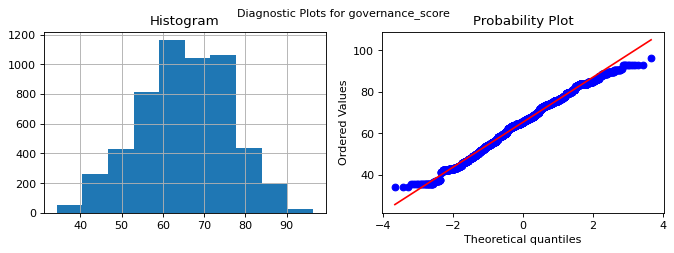

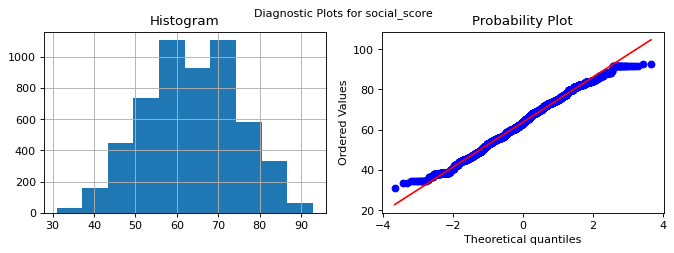

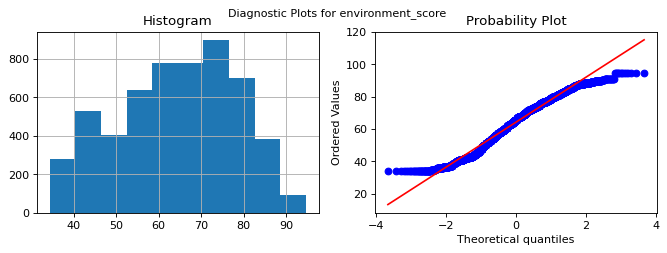

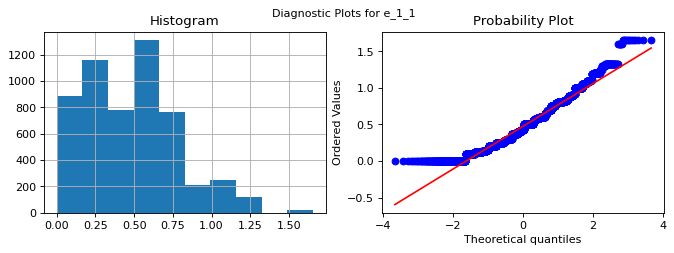

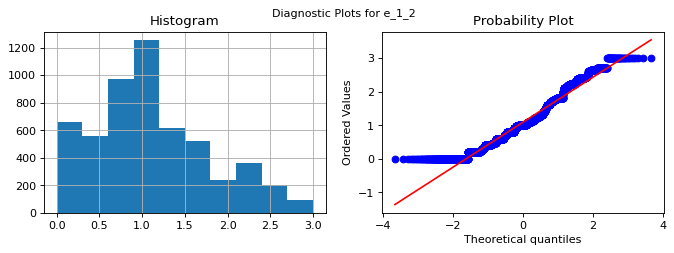

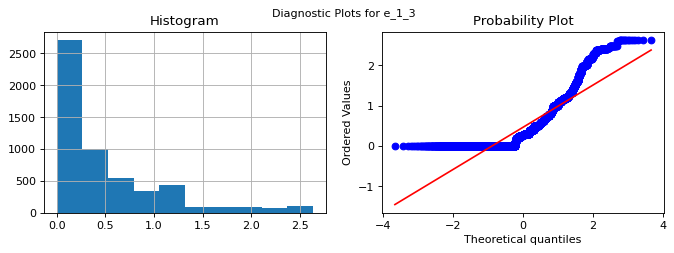

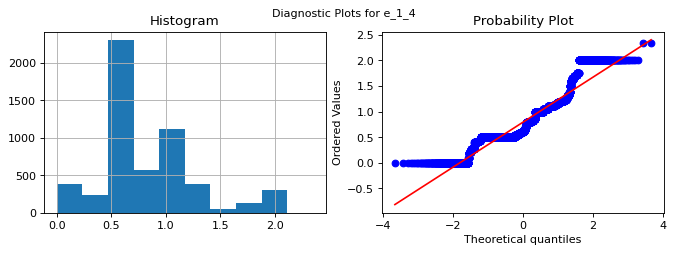

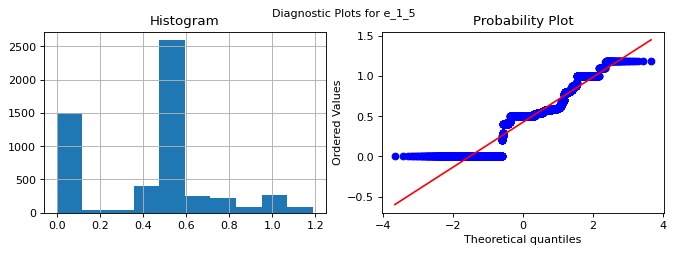

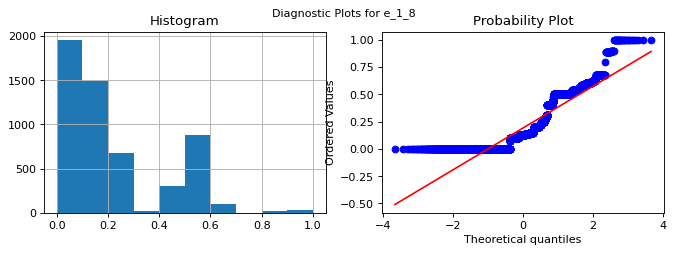

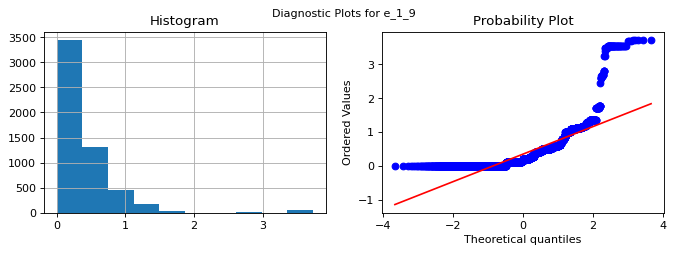

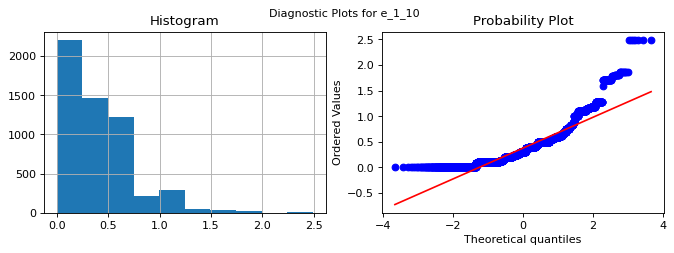

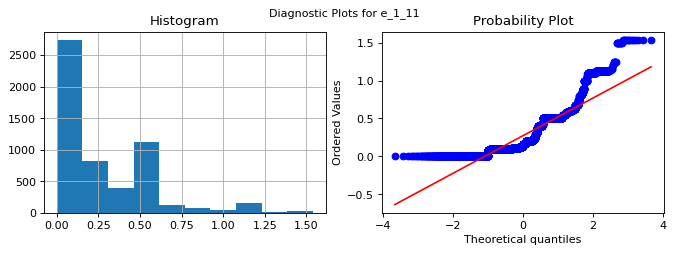

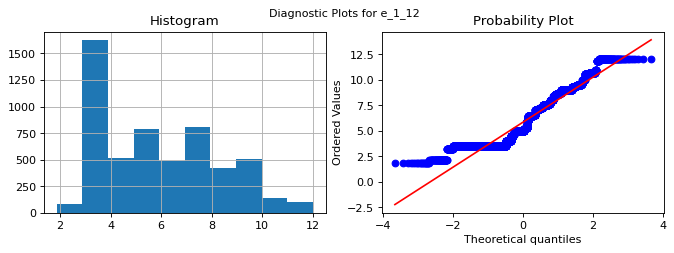

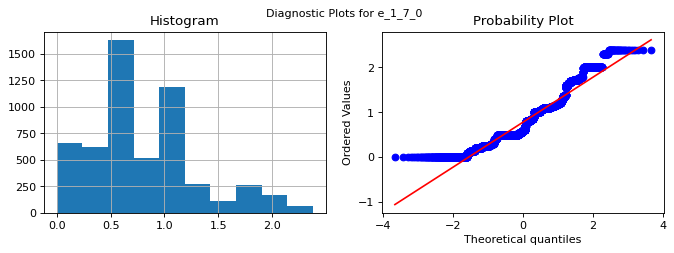

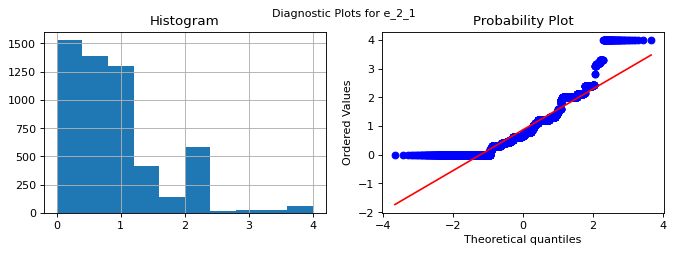

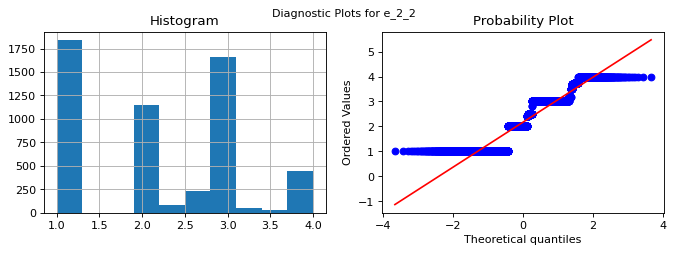

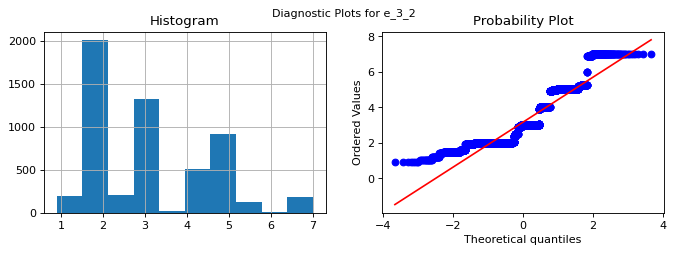

In [43]:
#Extract all numeric variables.
num_fea = ['total_esg_score',
       'governance_score', 'social_score', 'environment_score', 'e_1_1',
       'e_1_2', 'e_1_3', 'e_1_4', 'e_1_5', 'e_1_8', 'e_1_9', 'e_1_10',
       'e_1_11', 'e_1_12', 'e_1_7_0', 'e_2_1', 'e_2_2', 'e_3_2']
X_num_fea = d_3[num_fea]
import scipy.stats as stats
def diagnostic_plots(df, variable):
  plt.figure(figsize=(10,3))
  plt.subplot(1, 2, 1)
  df[variable].hist()
  plt.title("Histogram")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.suptitle("Diagnostic Plots for {}".format(variable),fontsize = 10)
  plt.show()
# obtain the diagnostic plots for all numeric variables
for variable_name in X_num_fea:
  diagnostic_plots(d_3, variable_name)

In [44]:
from scipy.stats import skew 
for i, variable_name in enumerate(X_num_fea):
  skew_val = pd.DataFrame([skew(X_num_fea[variable_name])], index = [variable_name], columns=["skewness"])
  
  if i == 0:
      skew_df = skew_val.T
  else:
      skew_df = pd.concat([skew_df, skew_val.T], axis=1)
skew_df

,total_esg_score,governance_score,social_score,environment_score,e_1_1,e_1_2,e_1_3,e_1_4,e_1_5,e_1_8,e_1_9,e_1_10,e_1_11,e_1_12,e_1_7_0,e_2_1,e_2_2,e_3_2
skewness,-0.300755,-0.174212,-0.068824,-0.239858,0.646288,0.548781,1.538477,0.883478,-0.038368,1.055694,3.366928,1.738865,1.496952,0.567321,0.786816,1.291126,0.110056,0.903004


In [45]:
d_3.columns

Index(['number', 'date', 'company', 'peer_group_root', 'type_template',
       'type_listing', 'region', 'country', 'isin', 'total_esg_score',
       'governance_score', 'social_score', 'environment_score', 'e_1_1',
       'e_1_2', 'e_1_3', 'e_1_4', 'e_1_5', 'e_1_6', 'e_1_8', 'e_1_9', 'e_1_10',
       'e_1_11', 'e_1_12', 'e_1_7_0', 'e_2_1', 'e_2_2', 'e_3_2'],
      dtype='object')

##  Feature Engineering


After pre-processing the data, we observed that many environmental variables were right skewed.
Therefore, we need to take the logarithm of these variables. At the same time, since the dimensions
11 of different variables are not the same, we need to standardize these data. But we will integrate these into pipeline in regression model.

# regression for ESG score and other numeric variables

In [47]:
y1 = d_3['total_esg_score']   #y1 is total score
X1=d_3[['e_1_1','e_1_2', 'e_1_3', 'e_1_4', 'e_1_5', 'e_1_8', 'e_1_9', 'e_1_10','e_1_11', 'e_1_12', 'e_1_7_0', 'e_2_1', 'e_2_2', 'e_3_2']]  #x1 is all numerical variables
y2=d_3['environment_score']    #y2 is just focus on E
X2=d_3[['environment_score','social_score','governance_score']]  #x2 is focus on different scores

Some useful functions

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    if m.intercept_ is None:
        return m.coef_    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """  
    y_hat = m.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )   
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")     
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")        
        plt.subplots_adjust(left=0.0)       
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    return rmse

Before proceeding with model building, we need to split the data into training and test sets in order
to understand how the different pre-processing steps work on the untrained data. Here, we split the
training and test sets into 80% and 20%.

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y2,train_size = 0.8, random_state=42)
# change the index of the train set and the test set
X_train = np.c_[X_train]
y_train = y_train.reset_index(drop = True)
X_test = np.c_[X_test]
y_test = y_test.reset_index(drop = True)

In [52]:
X_train 

array([[1.    , 1.8   , 0.75  , ..., 1.2   , 2.    , 2.    ],
       [0.1   , 0.3   , 0.    , ..., 0.6   , 2.    , 3.    ],
       [1.3   , 2.6   , 1.9   , ..., 0.3   , 2.5   , 2.    ],
       ...,
       [0.4291, 1.1333, 0.5666, ..., 0.6476, 1.    , 1.9998],
       [0.75  , 1.8   , 0.75  , ..., 1.6   , 2.    , 2.0002],
       [0.    , 0.    , 0.    , ..., 0.    , 1.    , 5.    ]])

[64.23566545  2.15990511  1.86834182  2.00819917 -1.1621717   3.83563926
  3.90334109  0.59057925 -0.68215032  1.0594168   0.74472147 -1.54657675
  3.98860474  0.96996312  1.34539139]
0.647535986936306
0.6650342974659675


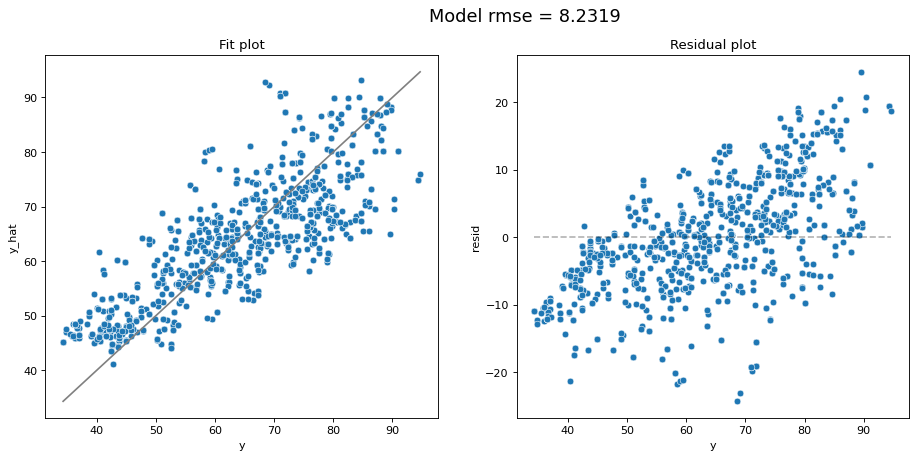

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [53]:
# Create a `Pipeline` compatible transformer to do a boxcox transformation.
# The data needs to be standardized thus the StandardScaler() is supposed to be added.
from sklearn.preprocessing import StandardScaler
import sklearn
reg_pipe = make_pipeline(
  StandardScaler(),
  LinearRegression()
)
reg_pipe.fit(X_train, y_train)
# print out the coefficients
print(get_coefs(reg_pipe))
# print out the fit plot and residual plot
print(reg_pipe.score(X_train,y_train))
print(reg_pipe.score(X_test,y_test))
model_fit(reg_pipe, X_test, y_test, plot=True)
reg_pipe


lasso regression

[64.23566545  2.15990511  1.86834182  2.00819917 -1.1621717   3.83563926
  3.90334109  0.59057925 -0.68215032  1.0594168   0.74472147 -1.54657675
  3.98860474  0.96996312  1.34539138]
0.6475359869363059
0.6650342974693559


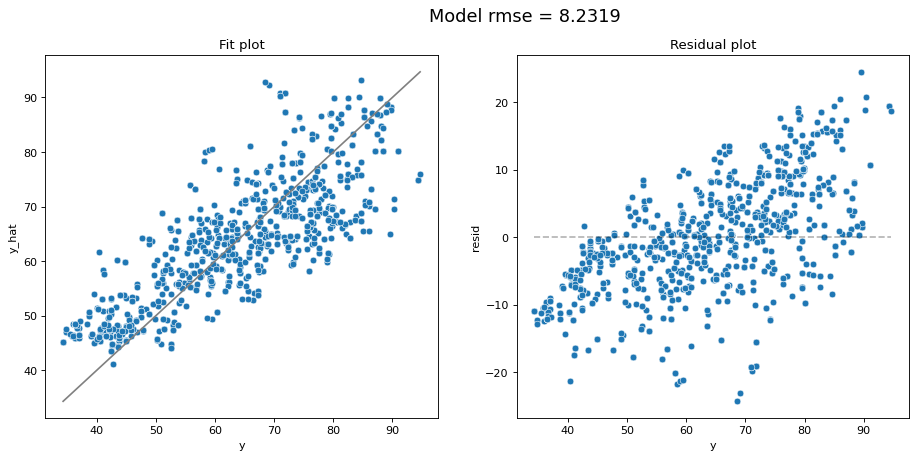

8.231903454099537

In [54]:
from sklearn.linear_model import Lasso
# Create a `Pipeline` compatible transformer to do a boxcox transformation.
lasso_pipe = make_pipeline(
StandardScaler(),
Lasso(alpha=10e-10)
)
lasso_pipe.fit(X_train, y_train)
# print out the coefficients of lasso regression
print(get_coefs(lasso_pipe))
# print out the fit plot and residual plot of lasso regression
print(lasso_pipe.score(X_train,y_train))
print(lasso_pipe.score(X_test,y_test))
model_fit(lasso_pipe, X_test, y_test, plot=True)


Regression results

In [55]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train1 = scaler.transform(X_train)

X_train2 = np.c_[np.ones(len(y_train)),X_train1]

model = sm.OLS(y_train,X_train2).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      environment_score   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     573.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:13:13   Log-Likelihood:                -15514.
No. Observations:                4388   AIC:                         3.106e+04
Df Residuals:                    4373   BIC:                         3.115e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2357      0.126    511.649      0.000      63.990      64.482
x1             2.1599      0.185     11.656      0.000       1.797       2.523
x2             1.8683      0.230      8.116      0.000       1.417       2.320
x3             2.0082      0.178     11.284      0.000       1.659       2.357
x4            -1.1622      0.151     -7.692      0.000      -1.458      -0.866
x5             3.8356      0.171     22.456      0.000       3.501       4.171
x6             3.9033      0.152     25.692      0.000       3.605       4.201
x7             0.5906      0.148      3.984      0.000       0.300       0.881
x8            -0.6822      0.156     -4.376      0.000      -0.988      -0.377
x9             1.0594      0.146      7.238      0.000       0.772       1.346
x10            0.7447      0.169      4.399      0.000       0.413       1.077
x11           -1.5466      0.200     -7.748      0.000      -1.938      -1.155
x12            3.9886      0.157     25.354      0.000       3.680       4.297
x13            0.9700      0.172      5.652      0.000       0.634       1.306
x14            1.3454      0.157      8.594      0.000       1.038       1.652
==============================================================================
Omnibus:                       10.097   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.341
Skew:                          -0.017   Prob(JB):                       0.0154
Kurtosis:                       2.789   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Forecasting climate variables in the UK for 5 years

Prediction by grey model (GM(1,1) for energy use

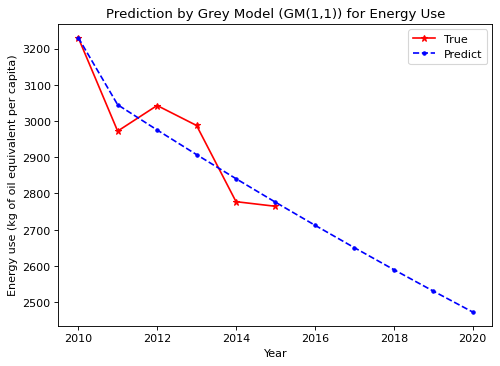

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Linear translation preprocessing to ensure that the data level ratio is within the acceptable coverage range
def greyModelPreprocess(dataVec):
    "Set linear-bias c for dataVec"
    import numpy as np
    from scipy import io, integrate, linalg, signal
    from scipy.sparse.linalg import eigs
    from scipy.integrate import odeint

    c = 0
    x0 = np.array(dataVec, float)
    n = x0.shape[0]
    L = np.exp(-2/(n+1))
    R = np.exp(2/(n+2))
    xmax = x0.max()
    xmin = x0.min()
    if (xmin < 1):
        x0 += (1-xmin)
        c += (1-xmin)
    xmax = x0.max()
    xmin = x0.min()
    lambda_ = x0[0:-1] / x0[1:]  # 计算级比
    lambda_max = lambda_.max()
    lambda_min = lambda_.min()
    while (lambda_max > R or lambda_min < L):
        x0 += xmin
        c += xmin
        xmax = x0.max()
        xmin = x0.min()
        lambda_ = x0[0:-1] / x0[1:]
        lambda_max = lambda_.max()
        lambda_min = lambda_.min()
    return c

# grey prediction model
def greyModel(dataVec, predictLen):
    "Grey Model for exponential prediction"
    # dataVec = [1, 2, 3, 4, 5, 6]
    # predictLen = 5
    import numpy as np
    from scipy import io, integrate, linalg, signal
    from scipy.sparse.linalg import eigs
    from scipy.integrate import odeint

    x0 = np.array(dataVec, float)
    n = x0.shape[0]
    x1 = np.cumsum(x0)
    B = np.array([-0.5 * (x1[0:-1] + x1[1:]), np.ones(n-1)]).T
    Y = x0[1:]
    u = linalg.lstsq(B, Y)[0]

    def diffEqu(y, t, a, b):
        return np.array(-a * y + b)

    t = np.arange(n + predictLen)
    sol = odeint(diffEqu, x0[0], t, args=(u[0], u[1]))
    sol = sol.squeeze()
    res = np.hstack((x0[0], np.diff(sol)))
    return res

# input data
x = np.array([3230.62, 2972.15, 3042.86, 2987.70, 2777.31, 2764.52])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c
plt.figure(figsize=(7,5))
# draw graphs
t1 = [2010,2011,2012,2013,2014,2015]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Energy use (kg of oil equivalent per capita)')
plt.title('Prediction by Grey Model (GM(1,1)) for Energy Use')
plt.show()

Prediction by grey model (GM(1,1) for fossil fuel energy consumption


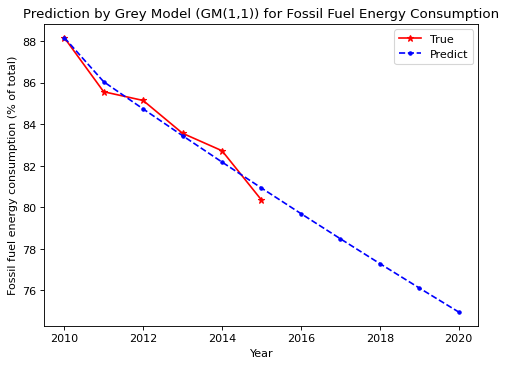

In [58]:
x = np.array([88.17, 85.56, 85.14, 83.56, 82.72, 80.35])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c
plt.figure(figsize=(7,5))
# 画图
t1 = [2010,2011,2012,2013,2014,2015]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Fossil fuel energy consumption (% of total)')
plt.title('Prediction by Grey Model (GM(1,1)) for Fossil Fuel Energy Consumption')
plt.show()

Prediction by grey model (GM(1,1) for renewable electricity output

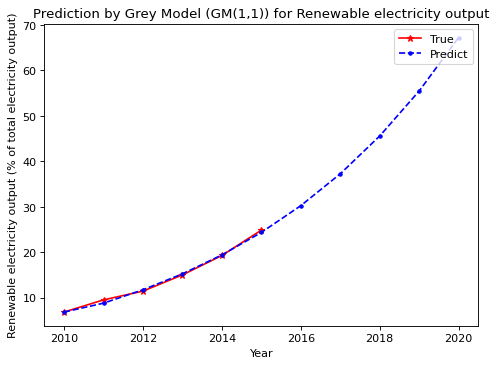

In [59]:
plt.figure(figsize=(7,5))
x = np.array([6.81, 9.49, 11.42, 14.99, 19.26, 24.84])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c

# 画图
t1 = [2010,2011,2012,2013,2014,2015]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Renewable electricity output (% of total electricity output)')
plt.title('Prediction by Grey Model (GM(1,1)) for Renewable electricity output')
plt.show()

Prediction by grey model (GM(1,1) for renewable energy consumption

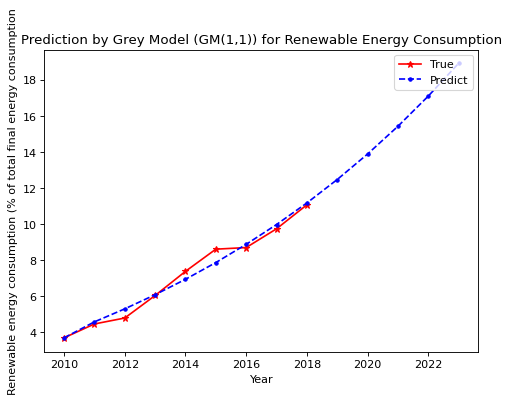

In [60]:
x = np.array([3.67, 4.44, 4.77, 6.02, 7.36, 8.59, 8.68, 9.72, 11.05])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c
plt.figure(figsize=(7,5))
# 画图
t1 = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Renewable energy consumption (% of total final energy consumption')
plt.title('Prediction by Grey Model (GM(1,1)) for Renewable Energy Consumption')
plt.show()

Prediction by grey model (GM(1,1) for CO2 emissions

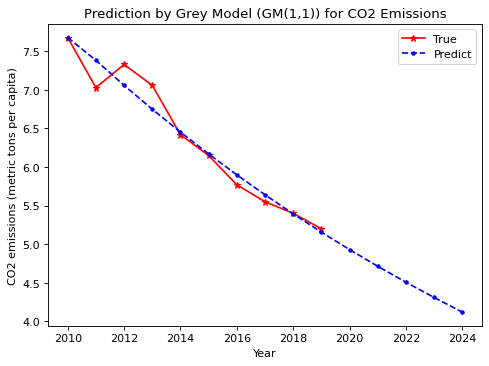

In [61]:
x = np.array([7.68, 7.03, 7.33, 7.06, 6.42, 6.15, 5.77, 5.55, 5.40, 5.20])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c
plt.figure(figsize=(7,5))
# 画图
t1 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Prediction by Grey Model (GM(1,1)) for CO2 Emissions')
plt.show()

Prediction by grey model (GM(1,1) for forest area

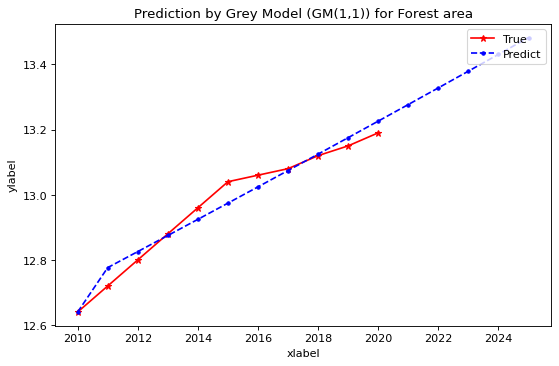

In [62]:
x = np.array([12.64, 12.72, 12.80, 12.88, 12.96, 13.04, 13.06, 13.08, 13.12, 13.15, 13.19])
c = greyModelPreprocess(x)
x_hat = greyModel(x+c, 5)-c

# 画图
t1 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
t2 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025]
plt.plot(t1, x, color='r', linestyle="-", marker='*', label='True')
plt.plot(t2, x_hat, color='b', linestyle="--", marker='.', label="Predict")
plt.legend(loc='upper right')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Prediction by Grey Model (GM(1,1)) for Forest area')
plt.show()

# Transform the ESG rating of different regions into the ESG score

Data collection

In [83]:
d_UK = pd.read_csv("./eq_UK.csv")
d_UK


,Security Description,ISIN,CUSIP,Market Value %,GICS Sector,Country Name,MSCI ESG Rating
0,3I GROUP PLC,GB00B1YW4409,SB1YW4404,0.2%,Financials,United Kingdom,AA
1,4IMPRINT GROUP PLC,GB0006640972,S06640973,0.0%,Communication Services,United Kingdom,NaN
2,888 HOLDINGS PLC,GI000A0F6407,SB0L4LM97,0.0%,Consumer Discretionary,United Kingdom,AA
3,A G BARR PLC,GB00B6XZKY75,SB6XZKY74,0.0%,Consumer Staples,United Kingdom,A
4,ABRDN PLC,GB00BF8Q6K64,SBF8Q6K67,0.1%,Financials,United Kingdom,AAA
...,...,...,...,...,...,...,...
340,WOOD GROUP (JOHN) PLC,GB00B5N0P849,SB5N0P840,0.0%,Energy,United Kingdom,AA
341,WORKSPACE GROUP REIT PLC,GB00B67G5X01,SB67G5X01,0.0%,Real Estate,United Kingdom,AA
342,WPP PLC,JE00B8KF9B49,SB8KF9B49,0.1%,Communication Services,United Kingdom,AA
343,XPS PENSIONS GROUP PLC,GB00BDDN1T20,SBDDN1T22,0.0%,Financials,United Kingdom,A


In [84]:
d_UK = d_UK.dropna(axis=0,how='any') # cancel missing values
d_UK.reset_index(drop=True) 


,Security Description,ISIN,CUSIP,Market Value %,GICS Sector,Country Name,MSCI ESG Rating
0,3I GROUP PLC,GB00B1YW4409,SB1YW4404,0.2%,Financials,United Kingdom,AA
1,888 HOLDINGS PLC,GI000A0F6407,SB0L4LM97,0.0%,Consumer Discretionary,United Kingdom,AA
2,A G BARR PLC,GB00B6XZKY75,SB6XZKY74,0.0%,Consumer Staples,United Kingdom,A
3,ABRDN PLC,GB00BF8Q6K64,SBF8Q6K67,0.1%,Financials,United Kingdom,AAA
4,ADMIRAL GROUP PLC,GB00B02J6398,SB02J6397,0.0%,Financials,United Kingdom,A
...,...,...,...,...,...,...,...
272,WOOD GROUP (JOHN) PLC,GB00B5N0P849,SB5N0P840,0.0%,Energy,United Kingdom,AA
273,WORKSPACE GROUP REIT PLC,GB00B67G5X01,SB67G5X01,0.0%,Real Estate,United Kingdom,AA
274,WPP PLC,JE00B8KF9B49,SB8KF9B49,0.1%,Communication Services,United Kingdom,AA
275,XPS PENSIONS GROUP PLC,GB00BDDN1T20,SBDDN1T22,0.0%,Financials,United Kingdom,A


As M&G plc uses the MSCI ESG rating to achieve environmental ratings for different equities. Therefore, we first need to convert these seven environmental ratings into a score that we can calculate. We
give AAA grades 9 scores, AA grades 8 scores, and A grades 7 scores, these grades belong to leaders.
In the average rating level, we give the BBB grade 6 scores, BB grade 5 scores, and for the laggard
rating level, we give the B grade 4 scores and CCC 2 scores

Calcute the average ESG score for UK

In [85]:
d_UK['ESG_score']=d_UK['MSCI ESG Rating']  
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
d_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 344
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Security Description  277 non-null    object
 1   ISIN                  277 non-null    object
 2   CUSIP                 277 non-null    object
 3   Market Value %        277 non-null    object
 4   GICS Sector           277 non-null    object
 5   Country Name          277 non-null    object
 6   MSCI ESG Rating       277 non-null    object
 7   ESG_score             277 non-null    object
dtypes: object(8)
memory usage: 19.5+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
for i,j in replace_rating.items():
  d_UK['ESG_score']=d_UK['ESG_score'].replace(i,j)
d_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 344
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Security Description  277 non-null    object
 1   ISIN                  277 non-null    object
 2   CUSIP                 277 non-null    object
 3   Market Value %        277 non-null    object
 4   GICS Sector           277 non-null    object
 5   Country Name          277 non-null    object
 6   MSCI ESG Rating       277 non-null    object
 7   ESG_score             277 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 19.5+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
d_UK['Market Value %'] = d_UK['Market Value %'].str.strip("%").astype(float)/100 # calculate the percentage of market values of different companies in one region


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
(d_UK['ESG_score']*d_UK['Market Value %']/d_UK['Market Value %'].sum()).sum()

8.024999999999999

Calcute the average ESG score for Europe ex Uk

In [89]:
d_Euro = pd.read_csv("./eq_Europe_exUK.csv")
d_Euro=d_Euro.dropna(axis=0,how='any')
d_Euro.reset_index(drop=True)
d_Euro['ESG_score']=d_Euro['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_Euro['ESG_score']=d_Euro['ESG_score'].replace(i,j)

d_Euro['Market Value %']=d_Euro['Market Value %'].str.strip("%").astype(float)/100
(d_Euro['ESG_score']*d_Euro['Market Value %']/d_Euro['Market Value %'].sum()).sum()

7.423076923076923

Calcute the average ESG score for North America

In [98]:
d_NA = pd.read_csv("./eq_North_America.csv")
d_NA=d_NA.dropna(axis=0,how='any')
d_NA.reset_index(drop=True)
d_NA['ESG_score']=d_NA['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_NA['ESG_score']=d_NA['ESG_score'].replace(i,j)

d_NA['Market Value %']=d_NA['Market Value %'].str.strip("%").astype(float)/100
(d_NA['ESG_score']*d_NA['Market Value %']/d_NA['Market Value %'].sum()).sum()

7.096774193548388

Calcute the average ESG score for China

In [91]:
d_China = pd.read_csv("./eq_China.csv")
d_China=d_China.dropna(axis=0,how='any')
d_China.reset_index(drop=True)
d_China['ESG_score']=d_China['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_China['ESG_score']=d_China['ESG_score'].replace(i,j)

d_China['Market Value %']=d_China['Market Value %'].str.strip("%").astype(float)/100
(d_China['ESG_score']*d_China['Market Value %']/d_China['Market Value %'].sum()).sum()

4.857142857142857

Calcute the average ESG score for India

In [92]:
d_India = pd.read_csv("./eq_India.csv")
d_India=d_India.dropna(axis=0,how='any')
d_India.reset_index(drop=True)
d_India['ESG_score']=d_India['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_India['ESG_score']=d_India['ESG_score'].replace(i,j)

d_India['Market Value %']=d_India['Market Value %'].str.strip("%").astype(float)/100
(d_India['ESG_score']*d_India['Market Value %']/d_India['Market Value %'].sum()).sum()

6.428571428571428

Calcute the average ESG score for  Asia ex Japan

In [93]:
d_Asia = pd.read_csv("./eq_Asia_exJapan.csv")
d_Asia =d_Asia.dropna(axis=0,how='any')
d_Asia.reset_index(drop=True)
d_Asia['ESG_score']=d_Asia['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_Asia['ESG_score']=d_Asia['ESG_score'].replace(i,j)

d_Asia['Market Value %']=d_Asia['Market Value %'].str.strip("%").astype(float)/100
(d_Asia['ESG_score']*d_Asia['Market Value %']/d_Asia['Market Value %'].sum()).sum()

7.333333333333332

Calcute the average ESG score for Global_Emerging_Mkts

In [94]:
d_Global = pd.read_csv("./eq_Global_Emerging_Mkts.csv")
d_Global =d_Global.dropna(axis=0,how='any')
d_Global.reset_index(drop=True)
d_Global['ESG_score']=d_Global['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_Global['ESG_score']=d_Global['ESG_score'].replace(i,j)

d_Global['Market Value %']=d_Global['Market Value %'].str.strip("%").astype(float)/100
(d_Global['ESG_score']*d_Global['Market Value %']/d_Global['Market Value %'].sum()).sum()

8.0

Calcute the average ESG score for Japan

In [95]:
d_Japan = pd.read_csv("./eq_Japan.csv")
d_Japan =d_Japan.dropna(axis=0,how='any')
d_Japan.reset_index(drop=True)
d_Japan['ESG_score']=d_Japan['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_Japan['ESG_score']=d_Japan['ESG_score'].replace(i,j)

d_Japan['Market Value %']=d_Japan['Market Value %'].str.strip("%").astype(float)/100
(d_Japan['ESG_score']*d_Japan['Market Value %']/d_Japan['Market Value %'].sum()).sum()

7.052631578947369

Calcute the average ESG score for Middle East & Africa

In [96]:
d_Africa = pd.read_csv("./eq_Africa_with_other.csv")
d_Africa =d_Africa.dropna(axis=0,how='any')
d_Africa.reset_index(drop=True)
d_Africa['ESG_score']=d_Africa['MSCI ESG Rating']
replace_rating={'AAA':9,'AA':8,'A':7,'BBB':6,'BB':5,'B':4,'CCC':2}
for i,j in replace_rating.items():
  d_Africa['ESG_score']=d_Africa['ESG_score'].replace(i,j)


d_Africa['ESG_score'].sum()/len(d_Africa)

6.915492957746479

we guarantee the minimum return rate is 1.1, changing the
risk level controlled by OBMG for equities

Text(0.5, 1.0, 'Portfolio Percentages of Different Equities with Return Rate 1.1')

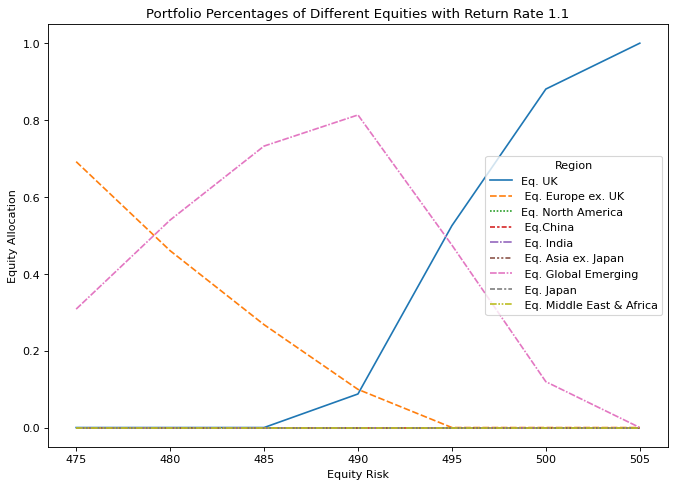

In [97]:
df=pd.read_csv("./Equity_risk3.csv")
df
plt.figure(figsize=(10,7))

sns.lineplot(x="Equity Risk", y="Equity Allocation",hue='Region',style='Region',data=df)
plt.title("Portfolio Percentages of Different Equities with Return Rate 1.1", fontsize = 12)